# Churn Modelling Analysis

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 8. Encoding Categorical Data

In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data = pd.get_dummies(data,drop_first=True)

In [13]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


# To Handle Imbalanced data

In [14]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [15]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

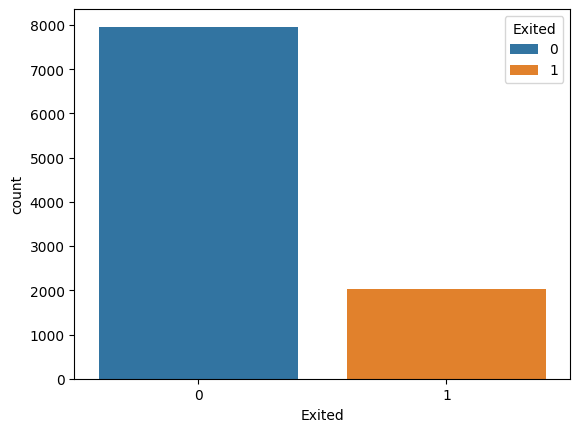

In [16]:
sns.countplot(x=data['Exited'],hue=data['Exited'])


In [17]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [18]:
from imblearn.over_sampling import SMOTE

# What is SMOTE?
SMOTE stands for Synthetic Minority Over-sampling Technique. It is an over-sampling method used to handle class imbalance in classification problems, where one class (usually the minority class) has far fewer samples than the other (majority class)

In [19]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [20]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc= StandardScaler()

In [25]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[ 0.46414457, -0.39710694,  0.81790969, ...,  1.31189153,
        -0.62783609, -1.2388781 ],
       [ 1.09695999,  0.10271942, -1.39037714, ..., -0.76225814,
        -0.62783609,  0.80718192],
       [-0.33233001,  0.40261523, -1.75842494, ...,  1.31189153,
        -0.62783609,  0.80718192],
       ...,
       [ 0.20228992,  0.20268469,  1.18595749, ..., -0.76225814,
        -0.62783609,  0.80718192],
       [-0.23413451,  0.30264996, -0.65428153, ..., -0.76225814,
         1.5927724 ,  0.80718192],
       [ 0.52960824,  1.00240687, -1.39037714, ...,  1.31189153,
        -0.62783609,  0.80718192]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log = LogisticRegression()

In [29]:
log.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred1 = log.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred1)

0.7777777777777778

In [33]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [34]:
precision_score(y_test,y_pred1)

0.7692797960484385

In [35]:
recall_score(y_test,y_pred1)

0.7772054088860271

In [36]:
f1_score(y_test,y_pred1)

0.7732222934016656

In [37]:
from sklearn import svm

In [38]:
svm = svm.SVC()

In [39]:
svm.fit(X_train,y_train)

SVC()

In [40]:
y_pred2 = svm.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred2)

0.8471437539234149

In [42]:
precision_score(y_test,y_pred2)

0.8447606727037517

# KNeighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:


y_pred3 = knn.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred3)

0.8151286880100439

In [48]:
precision_score(y_test,y_pred3)

0.7975308641975308

# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred4 = dt.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred4)

0.8050847457627118

In [54]:
precision_score(y_test,y_pred4)

0.7858895705521473

# Gradient BOOST classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbc = GradientBoostingClassifier()

In [57]:
gbc.fit(X_train,y_train)


GradientBoostingClassifier()

In [58]:
y_pred6 = gbc.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred6)

0.8468298807281858

In [60]:
precision_score(y_test,y_pred6)

0.8433268858800773

In [61]:
  from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
y_pred5 = rf.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred5)

0.8709981167608286

In [66]:
precision_score(y_test,y_pred5)

0.8632315521628499

# Comparing performance  of Used Models

In [67]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [68]:
final_data

,Models,ACC
0,LR,0.777778
1,SVC,0.847144
2,KNN,0.815129
3,DT,0.805085
4,RF,0.870998
5,GBC,0.846830


In [69]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

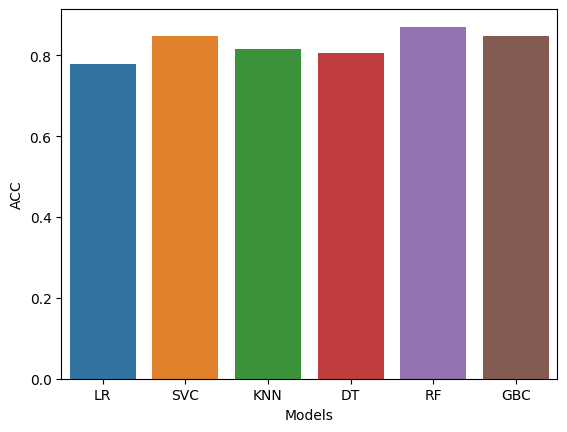

In [70]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'],hue=final_data['Models'])

In [71]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [72]:
final_data

,Models,PRE
0,LR,0.769280
1,SVC,0.844761
2,KNN,0.797531
3,DT,0.785890
4,RF,0.863232
5,GBC,0.843327


<Axes: xlabel='Models', ylabel='PRE'>

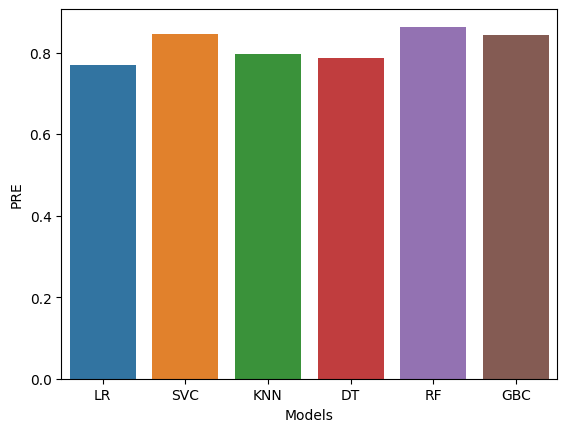

In [73]:
sns.barplot(x=final_data['Models'],y=final_data['PRE'],hue=final_data['Models'])

# Save The Model

In [74]:
X_res=sc.fit_transform(X_res)

In [75]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [76]:
import joblib

In [77]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [78]:
model = joblib.load('churn_predict_model')

In [79]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [80]:

model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

# GUI

In [81]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1  
    p10=int(e10.get())
    model = joblib.load('churn_model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))
    
    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)
    
    
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()